In [6]:
import numpy as np
import pandas as pd
import os,sys

In [7]:
path_data = os.path.join(os.getcwd(),os.pardir,os.pardir,'data')

In [8]:
protected_area_data_path = os.path.join(path_data,'protected_area')
# data_list = os.listdir(protected_area_data_path)
protected_area_data_file = os.path.join(protected_area_data_path,'NOAA_Marine_Protected_Areas_Inventory_2023.xlsx')
protected_area_data = pd.read_excel(protected_area_data_file)
protected_area_data = protected_area_data[['Percent Area Marine','Year Established','Longitude','Latitude']]
print(len(protected_area_data))

979


In [15]:
start_year = 2018
region = 'North America'
if region == 'Asia':
    lat_min_data, lat_max_data = 0, 40
    lon_min_data, lon_max_data = 100, 140
elif region == 'North America':
    lat_min_data, lat_max_data = 0, 40
    lon_min_data, lon_max_data = -100, -60
lat_min, lat_max = lat_min_data-5, lat_max_data+5
lon_min, lon_max = lon_min_data-5, lon_max_data+5

year_filtered_protected_area_data = protected_area_data[protected_area_data['Year Established'] < start_year]
region_filtered_protected_area_data = year_filtered_protected_area_data[(year_filtered_protected_area_data['Latitude'] > lat_min_data) & (year_filtered_protected_area_data['Latitude'] < lat_max_data) & (year_filtered_protected_area_data['Longitude'] > lon_min_data) & (year_filtered_protected_area_data['Longitude'] < lon_max_data)]
# get unique percent marine area, if lat and lon are the same, keep the one with the larger percent marine area
region_filtered_protected_area_data = region_filtered_protected_area_data.sort_values(by=['Latitude','Longitude','Percent Area Marine'],ascending=False)
region_filtered_protected_area_data = region_filtered_protected_area_data.drop_duplicates(subset=['Latitude','Longitude'],keep='first')
print(len(region_filtered_protected_area_data))

463


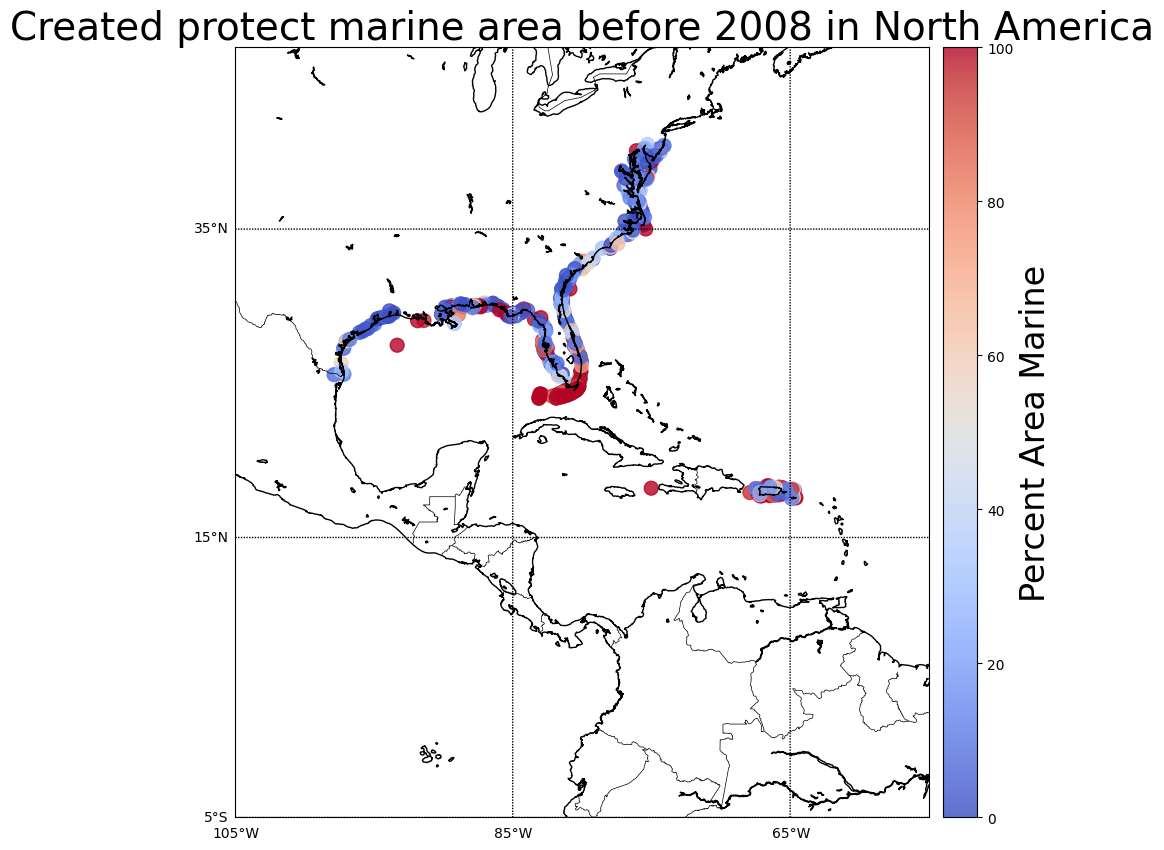

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

fontsize = 24
fontsize_title = 28
# Create a figure and axis with a size that you find appropriate
fig, ax = plt.subplots(figsize=(12, 10))

# Create a Basemap instance with a specific map projection, bounding lat/lon, and resolution
m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max, resolution='i', ax=ax)

# Draw coastlines and countries for reference
m.drawcoastlines()
m.drawcountries()

# Convert your latitude and longitude to the map projection coordinates
x, y = m(region_filtered_protected_area_data['Longitude'].values, region_filtered_protected_area_data['Latitude'].values)

# Create a colorbar and set its label
scatter = m.scatter(x, y, c=region_filtered_protected_area_data['Percent Area Marine'], cmap='coolwarm', alpha=0.8, s=100)
cb = m.colorbar(scatter, "right", size="5%", pad="2%")
cb.set_label('Percent Area Marine', fontsize=fontsize)

parallels = np.arange(lat_min, lat_max, 20.) # lines of latitude
meridians = np.arange(lon_min, lon_max, 20.) # lines of longitude
m.drawparallels(parallels, labels=[True,False,False,False])
m.drawmeridians(meridians, labels=[False,False,False,True])

# Show the plot
plt.title('Created protect marine area before' + ' ' + str(start_year) + ' ' + 'in' + ' ' + region, fontsize=fontsize_title)
# save to ./figures/
save_fig_folder = os.path.join(os.getcwd(),os.pardir,'figures')
if not os.path.exists(save_fig_folder):
    os.makedirs(save_fig_folder)
save_fig_path = os.path.join(save_fig_folder,'Protect_marine_area_before_' + str(start_year) + '_' + region + '.png')
plt.savefig(save_fig_path)
plt.show()
